In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler
# Score
from sklearn.metrics import accuracy_score 
 
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 20)
plt.style.use('ggplot')

In [41]:
# importamos el archivo 
data = pd.read_csv("segmentacion_clientes.csv" , delimiter=";" , decimal="," , encoding='utf-8')
df=data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631297 entries, 0 to 631296
Data columns (total 14 columns):
PRODUCT_ID              631297 non-null int64
SUBSCRIPTION_ID         631297 non-null int64
SUBSCRIBER_ID           631297 non-null int64
COMUNA                  631297 non-null object
TI                      631297 non-null object
TI2                     631297 non-null object
TIPO_REPARTO            631297 non-null object
QUEJAS                  631297 non-null int64
DAÑOS                   631297 non-null int64
CORTES                  631297 non-null int64
RECLAMOS                631297 non-null int64
FACTURACION_PROMEDIO    631297 non-null float64
SALDO_PROMEDIO          631297 non-null float64
ROTACION_CARTERA        631297 non-null float64
dtypes: float64(3), int64(7), object(4)
memory usage: 67.4+ MB


### Variables  
- 4 categoricas 
- 10 numéricas 



In [7]:
df.groupby('COMUNA').size().sort_values(ascending=False)

COMUNA
117 - VALPARAÍSO                                      120490
123 - Viña del Mar                                     84050
151 - Quilpué                                          64369
154 - Villa Alemana                                    48542
134 - Quillota                                         37300
139 - San Antonio                                      33589
145 - San Felipe                                       31341
125 - Los Andes                                        27642
119 - Concón                                           23283
135 - LA CALERA                                        19770
152 - Limache                                          18391
122 - Quintero                                         17550
141 - Cartagena                                        10719
147 - Llaillay                                          9059
121 - Puchuncaví                                        8960
137 - La Cruz                                           8690
153 - Olmué      

In [ ]:
# top comunas
#plt.plot( pd.DataFrame(df.groupby('COMUNA').size().sort_values(ascending=False)))

In [7]:
#values =  pd.DataFrame(df.groupby('COMUNA').size().sort_values(ascending=False)) 

In [8]:
#values.info()

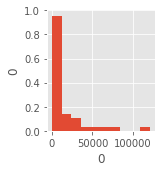

In [ ]:
#sns.pairplot( pd.DataFrame(values) )

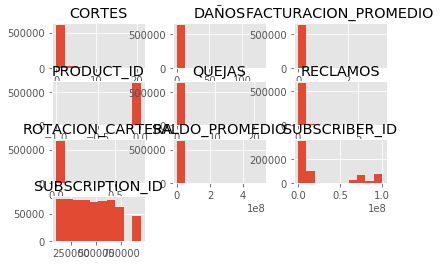

In [ ]:
df.hist()
plt.show()

In [44]:
#sns.pairplot(df.dropna(), hue='ROTACION_CARTERA',height=4, vars=["CORTES","DAÑOS","QUEJAS"],kind='scatter')

In [ ]:
sns.pairplot(df.dropna(), hue='RECLAMOS',height=6, vars=["CORTES","DAÑOS","QUEJAS"],kind='scatter')

## Selección de atributos 


In [14]:
df.columns

Index(['PRODUCT_ID', 'SUBSCRIPTION_ID', 'SUBSCRIBER_ID', 'COMUNA', 'TI', 'TI2',
       'TIPO_REPARTO', 'QUEJAS', 'DAÑOS', 'CORTES', 'RECLAMOS',
       'FACTURACION_PROMEDIO', 'SALDO_PROMEDIO', 'ROTACION_CARTERA'],
      dtype='object')

In [15]:
df[['RECLAMOS', 'QUEJAS', 'CORTES']].describe()

,RECLAMOS,QUEJAS,CORTES
count,631297.000000,631297.000000,631297.000000
mean,0.034109,0.067756,0.371065
std,0.209624,0.651856,1.048596
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,7.000000,22.000000,21.000000


In [16]:
X = np.array(df[['RECLAMOS', 'QUEJAS', 'CORTES']] )
y = np.array(df['DAÑOS'])
y = np.array(df['DAÑOS'])
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [17]:
 X = np.array(df[['SALDO_PROMEDIO', 'QUEJAS']] )

In [18]:
 X
    

array([[ 33256.6667,      0.    ],
       [ 36605.0833,      0.    ],
       [327823.5   ,      0.    ],
       ...,
       [  7083.25  ,      0.    ],
       [  8319.5   ,      0.    ],
       [ 10049.625 ,      0.    ]])

## 3D

In [19]:
fig = plt.figure()
#ax = Axes2D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    print( row )
    #print(colores[row])
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1]  ,  c=asignar,s=60)

0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
3
0
0
0
0
0
0
1
1
0
0
0
1
0
0
0
0
0
0
0
0
1
0
1
0
0
0
2
0
0
2
0
1
0
1
0
3
0
0
0
0
0
2
0
0
1
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
1
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
3
0
1
0
0
0
0
0
3
0
0
0
0
0
0
0
0
4
2
0
0
3
0
0
1
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
2
0
6
0
4
1
0
0
1
2
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
0
0
0
0
0
1
1
0
0
0
0
0
4
0
0
1
0
0
0
0
0
0
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
1
1
1
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
2
0
0
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
2
0
1
0
0
0
1
0
1
0
1
1
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
1
0
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
1
1
0
0
0
1
0
0
0
0


IndexError: list index out of range

<Figure size 1152x1440 with 0 Axes>

## Valor de K 

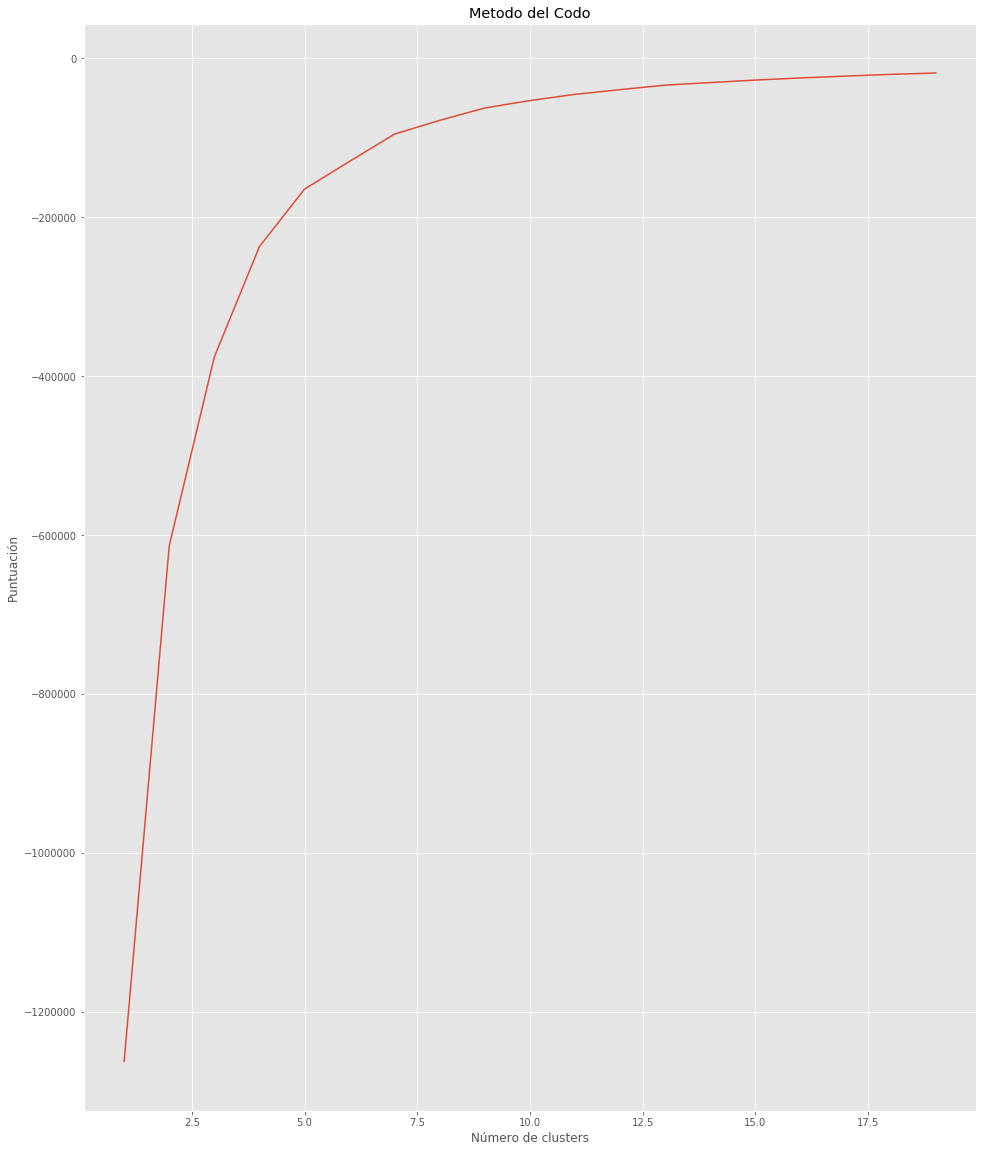

In [25]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
#score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Puntuación')
plt.title('Metodo del Codo')
plt.show()

## Dendograma

http://www.awesomestats.in/python-cluster-validation/

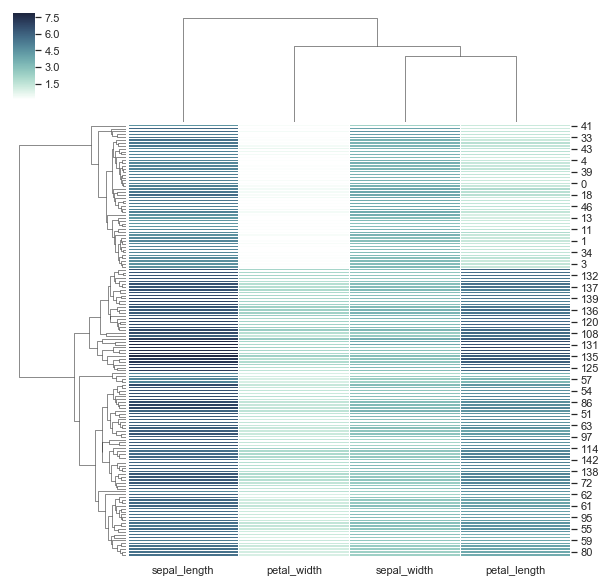

In [36]:
import seaborn as sns; sns.set(color_codes=True)
iris = sns.load_dataset("iris")
species = iris.pop("species")

cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
g = sns.clustermap(iris , cmap=cmap, linewidths=.5)

In [1]:
#cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
#sns.clustermap(X )

## Análisis codo

In [37]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( X )
    cluster_errors.append( clusters.inertia_ )

In [38]:
clusters_df = pd.DataFrame( {"num_clusters":cluster_range, "cluster_errors": cluster_errors } )

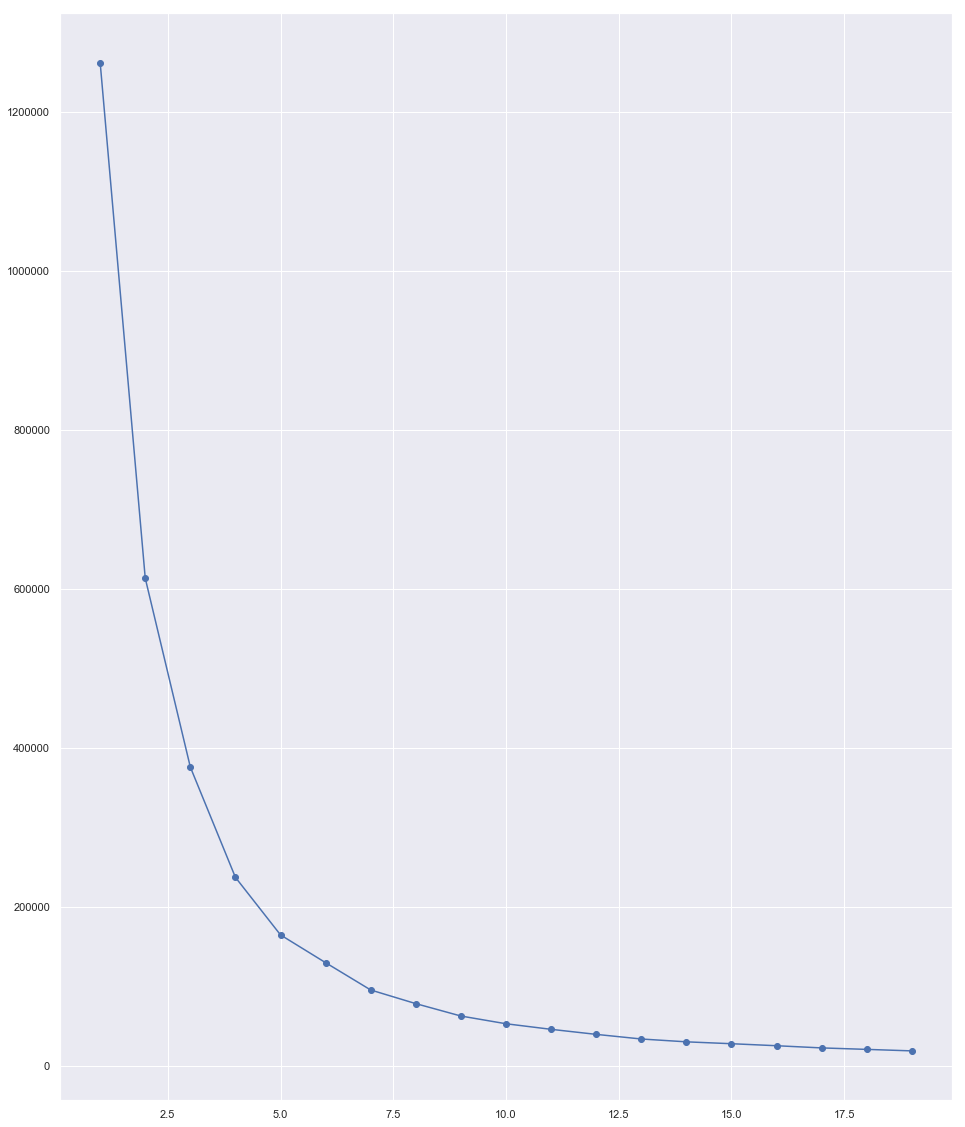

In [39]:
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

## K-means

In [3]:
## Muestreo de datos 
df = df.sample(frac=0.1 , random_state=42)

# Seleccion de variables 
X = np.array(df[['RECLAMOS', 'CORTES' , 'DAÑOS', 'QUEJAS' ]] )

# Estandarización
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Creando el modelo
kmeans = KMeans(n_clusters=5 , init='k-means++').fit(X)
 
# Prediciendo los clusters
labels = kmeans.predict(X)
  
# Obteniendo los centroides
C = kmeans.cluster_centers_

# Asignando los colores
colores=['red','cyan','yellow','orange','purple'] ## misma cantidad de colores que numero de k
asignar=[]

for row in labels:
    asignar.append(colores[row])

C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [6]:
import random
random.randint(1, 10)

6

Text(0.5,0,'Z DAÑOS')

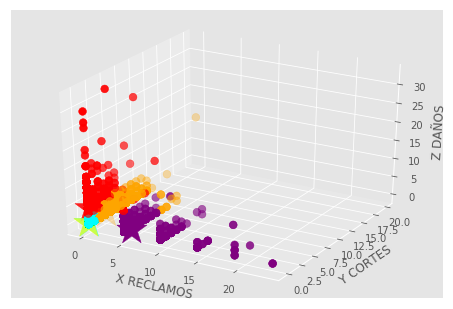

In [4]:
# Scatter 3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:,0], X[:,1], X[:,2], c=asignar,s=60)
ax.scatter(C[:,0], C[:,1], C[:,2], marker='*', c=colores, s=1000)
ax.set_xlabel('X RECLAMOS')
ax.set_ylabel('Y CORTES')
ax.set_zlabel('Z DAÑOS')

In [ ]:
## 3D plotly

In [5]:
import plotly.plotly as py
import plotly.graph_objs as go
import numpy as np

trace1 = go.Scatter3d(
    x=X[:, 0],
    y=X[:, 1],
    z=X[:, 2],
    mode='markers',
    marker=dict(
        size=6 ,
        color=asignar,          # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)
data = [trace1]
layout = go.Layout( 
    # Personalización
    scene = dict(
            xaxis = dict(title='X RECLAMOS'),
            yaxis = dict(title='Y CORTES'),
            zaxis = dict(title='Z DAÑOS'),),  
    margin=dict( 
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='3d-scatter-colorscale')

C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\plotly\plotly\plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 40k points for other types of charts. Here are some suggestions:
(1) Use the `plotly.graph_objs.Scattergl` trace object to generate a WebGl graph.
(2) Trying using the image API to return an image instead of a graph URL
(3) Use matplotlib
(4) See if you can create your visualization with fewer data points

If the visualization you're using aggregates points (e.g., box plot, histogram, etc.) you can disregard this warning.

C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\plotly\plotly\plotly.py:230: UserWarning:

Woah there! Look at all those points! Due to browser limitations, the Plotly SVG drawing functions have a hard time graphing more than 500k data points for line charts, or 4

The draw time for this plot will be slow for clients without much RAM.


C:\Users\cvargasa\AppData\Local\conda\conda\envs\cnn\lib\site-packages\plotly\api\v1\clientresp.py:40: UserWarning:

Estimated Draw Time Slow



In [ ]:
 #labels

In [22]:
from pandas.plotting import parallel_coordinates

In [ ]:
## df[['RECLAMOS', 'QUEJAS', 'CORTES']] 

In [41]:
#labels2 = pd.DataFrame(labels)

In [48]:
#X=pd.DataFrame(df[['RECLAMOS', 'CORTES' , 'DAÑOS' ]] , columns=['RECLAMOS', 'CORTES' , 'DAÑOS' ])

In [49]:
X['']
X['labels'] = labels
X['clase'] = labels

In [ ]:
dataframe.describe()

In [64]:
#dataframe = dataframe.drop(['labels'], axis=1)

In [70]:
#dataframe 

In [27]:
 ## get sample
dataframe = dataframe.sample(frac=0.05 , random_state=42)

In [50]:
 dataframe.shape

(63130, 5)

## Plotly 

In [6]:
import plotly.plotly as py
import plotly.graph_objs as go

#plotly.tools.set_credentials_file(username='slotbite', api_key='GYgRt3eXz6IdiIy3k7sO')

import pandas as pd  

In [7]:
X.shape  

(63130, 4)

In [8]:
labels.shape

(63130,)

In [13]:
labels

array([1, 1, 1, ..., 1, 3, 1])

In [25]:
import plotly.plotly as py
import plotly.graph_objs as go

import pandas as pd 

df = pd.read_csv("https://raw.githubusercontent.com/bcdunbar/datasets/master/iris.csv")

data = [
    go.Parcoords(
        line = dict(color = df['species_id'],
                   colorscale = [[0,'#23ebff'],[0.5,'#23D8C3'],[1,'#8f18fb']]),
        dimensions = list([
            dict(range = [0,8],
                constraintrange = [4,8],
                label = 'Sepal Length', values = df['sepal_length']),
            dict(range = [0,8],
                label = 'Sepal Width', values = df['sepal_width']),
            dict(range = [0,8],
                label = 'Petal Length', values = df['petal_length']),
            dict(range = [0,8],
                label = 'Petal Width', values = df['petal_width'])
        ])
    )
]

layout = go.Layout(
    plot_bgcolor = '#E5E5E5',
    paper_bgcolor = '#E5E5E5'
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'parcoords-basic')

In [19]:
data = [
    go.Parcoords(
        line = dict(color = labels  ,
                    colorscale = [[0,'#d62728'],
                                  [0,'#23ebff'],
                                  [0,'#bcbd22'],
                                  [0,'#ff7f0e'],
                                  [0,'#8f18fb']] ), 
        #line = dict(color = asignar  ), 
        dimensions = list([
            dict(
                #range = [0,8],
                #constraintrange = [4,8], valores preseleccionados
                label = 'RECLAMOS', values = X[:, 0]),
            dict(
                #range = [0,8],
                label = 'CORTES', values = X[:, 1]),
            dict(
                #range = [0,8],
                label = 'DAÑOS', values = X[:, 2]),
            dict(
                range = [0,4],# rango de clases
                label = 'CLASE', values = labels) 
        ])
    )
]

layout = go.Layout(
    plot_bgcolor = '#FFFFFF',
    paper_bgcolor = '#FFFFFF'
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'parcoords-basic')

## Todas las variables númericas

In [42]:
## Muestreo de datos 
df = data.sample(frac=0.5 , random_state=42)

In [43]:
## KMEANS
####################################################################



# Seleccion de variables 
X = np.array(df[['QUEJAS', 'DAÑOS', 'CORTES', 'RECLAMOS','FACTURACION_PROMEDIO', 'SALDO_PROMEDIO', 'ROTACION_CARTERA' ]] )

# Estandarización
scaler = StandardScaler().fit(X)
#X = scaler.transform(X)

# Creando el modelo
k=10
kmeans = KMeans(n_clusters=k ,  init='k-means++').fit(X)
 
# Prediciendo los clusters
labels = kmeans.predict(X)
  
# Obteniendo los centroides
C = kmeans.cluster_centers_

# Asignando los colores
colores=['red','cyan','yellow','orange','purple' , 'red','cyan','yellow','orange','purple'] ## misma cantidad de colores que numero de k
asignar=[]

for row in labels:
    asignar.append(colores[row])


## COORDENADAS PARALELAS 

data = [
    go.Parcoords(
        line = dict(color = labels   ),  
        dimensions = list([
            dict(
                #range = [0,8],
                #constraintrange = [4,8], valores preseleccionados
                label = 'QUEJAS' ,      values = X[:, 0]),
            dict(
                #range = [0,8],
                label = 'DAÑOS',        values = X[:, 1]),
            dict(
                #range = [0,8],
                label = 'CORTES',       values = X[:, 2]),
            dict(
                #range = [0,8],
                label = 'RECLAMOS',     values = X[:, 3]),
            dict(
                #range = [0,8],
                label = 'FACTURACION_PROMEDIO', values = X[:, 4]),
            dict(
                #range = [0,8],
                label = 'SALDO_PROMEDIO',   values = X[:, 5]),             
            dict(
                #range = [0,8],
                label = 'ROTACION_CARTERA', values = X[:, 6]),  
            dict(
                range = [0,k-1],#   5 CLUSTERS
                label = 'CLUSTER', values = labels) 
        ])
    )
]

layout = go.Layout(
    plot_bgcolor = '#FFFFFF',
    paper_bgcolor = '#FFFFFF'
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'parcoords-basic')

## Rotación cartera  vs Saldo promedio 

In [23]:
X = np.array(df[['SALDO_PROMEDIO' , 'QUEJAS']] )

# Estandarización
#scaler = StandardScaler().fit(X)
#X = scaler.transform(X)

kmeans = KMeans(n_clusters=5 , init='k-means++'  ).fit(X)
centroids = kmeans.cluster_centers_

# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1] , c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1] , marker='*', c=colores, s=1000)

ax.set_xlabel('X SALDO PROMEDIO')
ax.set_ylabel('Y QUEJAS') 

Text(0.5,0,'Y QUEJAS')

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000023D18DED620> (for post_execute):


ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (11,4) and requested shape (5,4)

ValueError: operands could not be broadcast together with remapped shapes [original->remapped]: (11,4) and requested shape (5,4)

<Figure size 1152x1440 with 1 Axes>

In [24]:
#plt.plot(kmeans.labels_[:])

## 2D

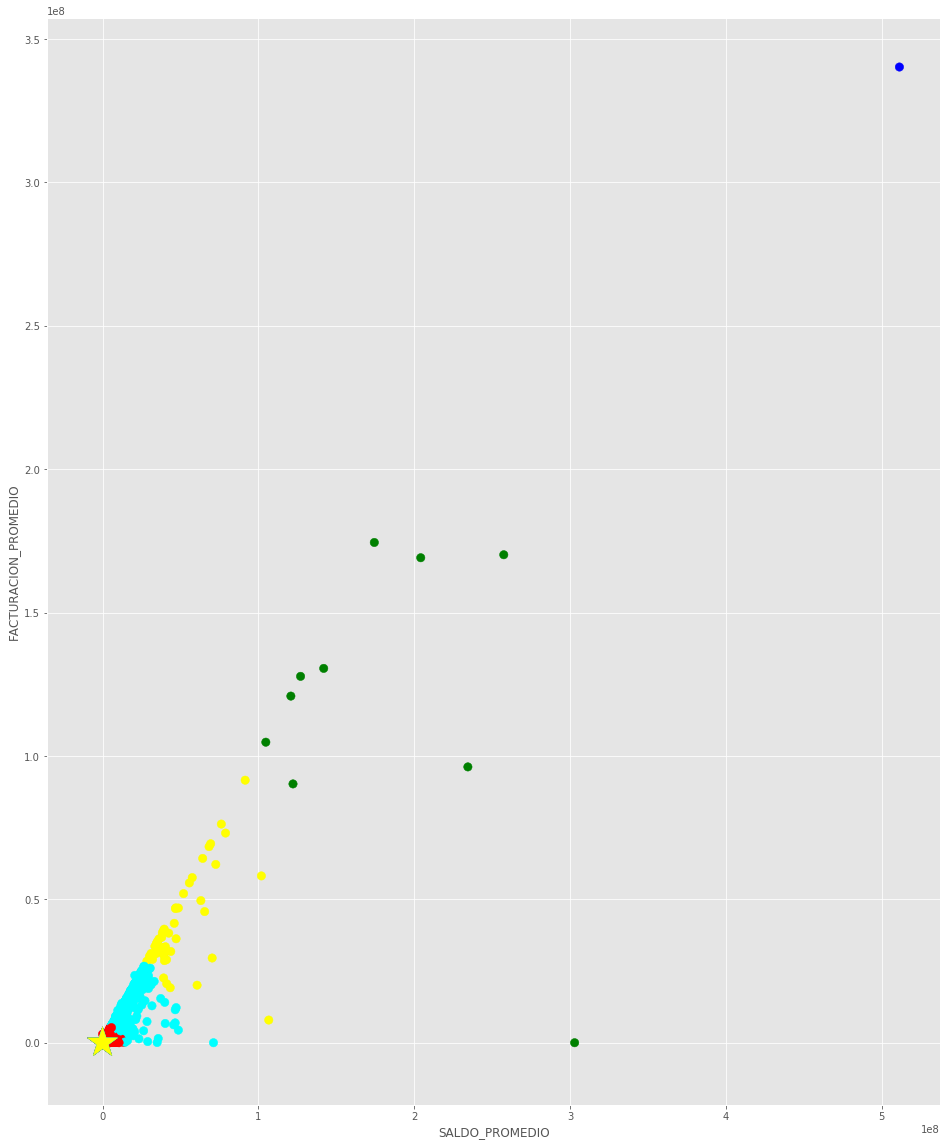

In [23]:
# seleccionando atributos
f1 = df['SALDO_PROMEDIO'].values
f2 = df['FACTURACION_PROMEDIO'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.xlabel('SALDO_PROMEDIO')
plt.ylabel('FACTURACION_PROMEDIO')
plt.show()

## Dendograma

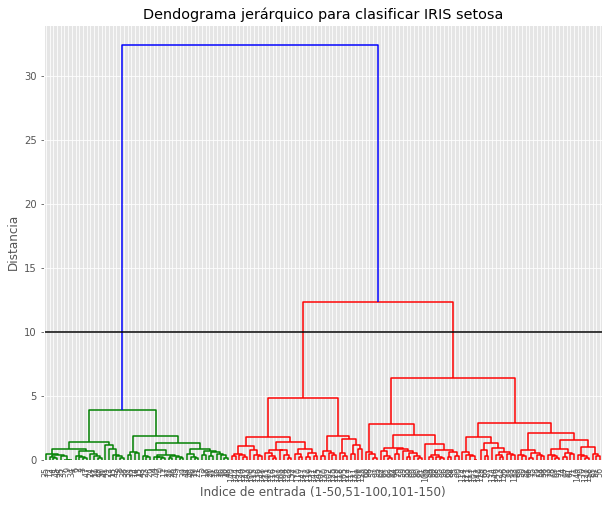

In [15]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X=iris.data

Z = linkage(X, 'ward')

plt.figure(figsize=(10, 8))
plt.title('Dendograma jerárquico para clasificar IRIS setosa')
plt.xlabel('Indice de entrada (1-50,51-100,101-150)')
plt.ylabel('Distancia')
max_d = 10
dendrogram(
        Z,
        leaf_rotation=90.,  
        leaf_font_size=8.,  
        show_contracted=True
    )
plt.axhline(y=max_d, c='k')
plt.show()

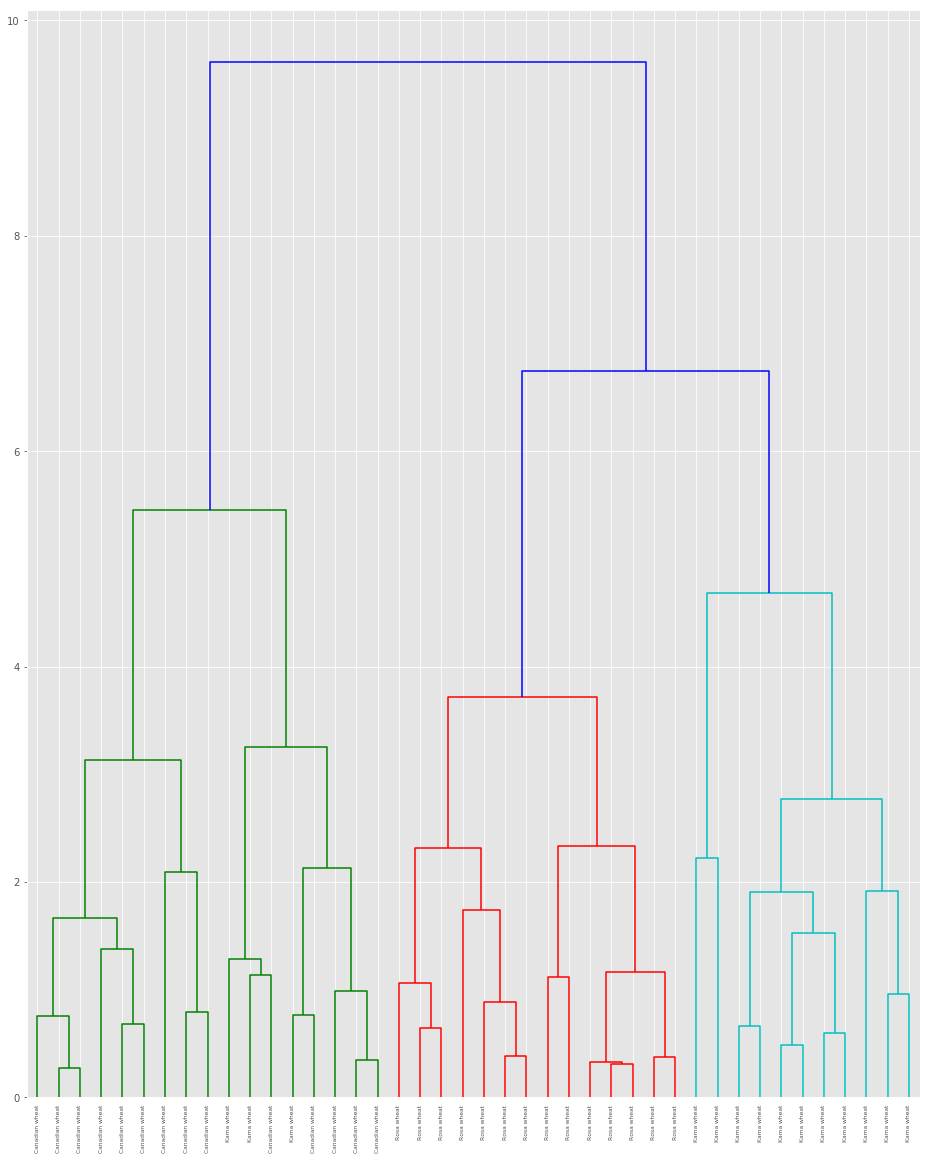

In [18]:

# Importing Modules
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# Reading the DataFrame
seeds_df = pd.read_csv("https://raw.githubusercontent.com/vihar/unsupervised-learning-with-python/master/seeds-less-rows.csv")

# Remove the grain species from the DataFrame, save for later
varieties = list(seeds_df.pop('grain_variety'))

# Extract the measurements as a NumPy array
samples = seeds_df.values

"""
Perform hierarchical clustering on samples using the
linkage() function with the method='complete' keyword argument.
Assign the result to mergings.
"""
mergings = linkage(samples, method='complete')

"""
Plot a dendrogram using the dendrogram() function on mergings,
specifying the keyword arguments labels=varieties, leaf_rotation=90,
and leaf_font_size=6.
"""
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show() 